# Linear Regression of single feature dataset

This Module is about simplest regression model you can create and see the learnings. 


In [84]:
import pandas as pd
import numpy as np
import torch 
from torch import nn
import matplotlib.pyplot  as plt

# set manual seed for reproducibility
torch.manual_seed(42)


[tensor([88.2269]), tensor([9.1500])]


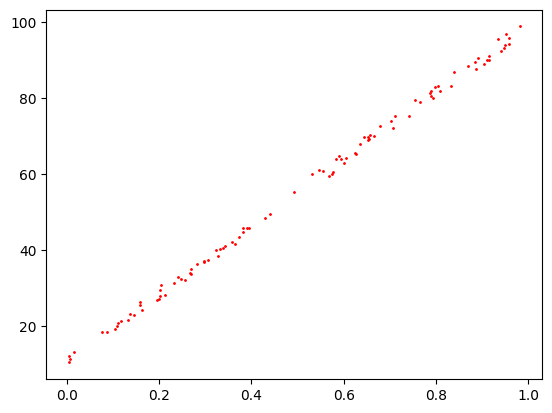

In [85]:
# Function which generates dataset 


def generate_dataset(n, noise_factor):
    a = torch.rand(1)*100
    b = torch.rand(1)*10
    x = torch.rand(n,1)
    noise = torch.rand(n,1)*noise_factor

    y = a*x + b + noise
    hidden = [a,b] # assume we know only x, y dataset . we have to find the hidden values for linear hypothesis

    return x ,  y , hidden


x ,  y , hidden = generate_dataset(100, noise_factor=4)
print(hidden)
plt.scatter(x,y, s=1,c='r')

In [86]:
# Now that our data set is ready . we will write a linear model to fit the data

model = nn.Sequential(nn.Linear(1,1)) # since we have one input and one output . we can just use the  any linear model to  predict the value 

print(f"model looks like this \n {model}")
print(f" \n initial weights  \n {model.state_dict()}")

print(f"x shape {x.shape} y shape : {y.shape}")


model looks like this 
 Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)
 
 initial weights  
 OrderedDict([('0.weight', tensor([[0.8421]])), ('0.bias', tensor([0.3896]))])
x shape torch.Size([100, 1]) y shape : torch.Size([100, 1])


 epoch 0 loss: 3653.34375
 epoch 1 loss: 3485.992431640625
 epoch 2 loss: 3327.02001953125
 epoch 3 loss: 3176.0048828125
 epoch 4 loss: 3032.546142578125
 epoch 5 loss: 2896.26416015625
 epoch 6 loss: 2766.797119140625
 epoch 7 loss: 2643.80322265625
 epoch 8 loss: 2526.955810546875
 epoch 9 loss: 2415.94677734375
 epoch 10 loss: 2310.481201171875
 epoch 11 loss: 2210.28125
 epoch 12 loss: 2115.081298828125
 epoch 13 loss: 2024.630615234375
 epoch 14 loss: 1938.689697265625
 epoch 15 loss: 1857.0316162109375
 epoch 16 loss: 1779.4415283203125
 epoch 17 loss: 1705.71435546875
 epoch 18 loss: 1635.6558837890625
 epoch 19 loss: 1569.0819091796875
 epoch 20 loss: 1505.8167724609375
 epoch 21 loss: 1445.6942138671875
 epoch 22 loss: 1388.5562744140625
 epoch 23 loss: 1334.2528076171875
 epoch 24 loss: 1282.6412353515625
 epoch 25 loss: 1233.58642578125
 epoch 26 loss: 1186.959716796875
 epoch 27 loss: 1142.6387939453125
 epoch 28 loss: 1100.5079345703125
 epoch 29 loss: 1060.456787109375
 

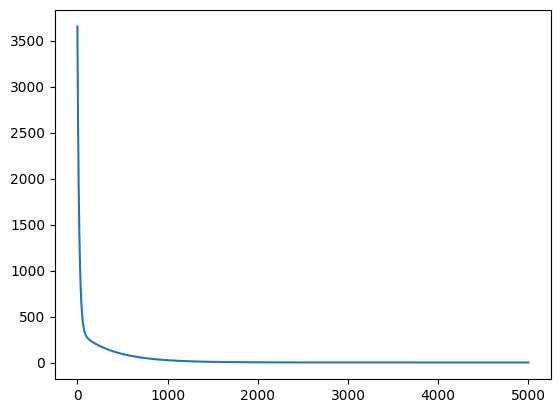

In [87]:
# define loss and optimizer 

criteria = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)


# trainning cycle 
epochs = 5000
losses=[]

for epoch in range(epochs):
    optimizer.zero_grad() # reset the gradient in each iteration 
    output = model(x)
    loss = criteria(output,y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    print(f" epoch {epoch} loss: {loss.item()}")


plt.plot(losses)


/var/folders/27/n5gxzmy10mx08j62x813rw080000gn/T/ipykernel_34456/681175481.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.plot(x,torch.tensor(yhat),c='r',linewidth=0.5)


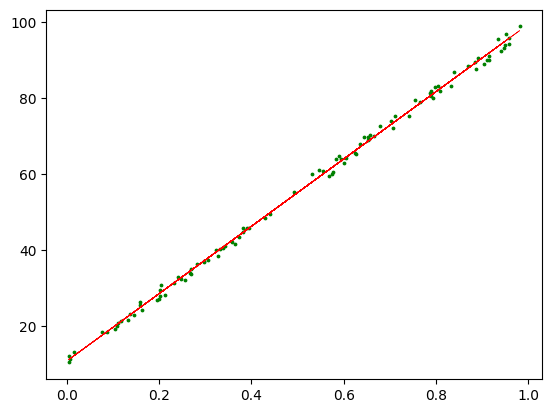

In [88]:
# plot predictions 

yhat = model(x)
plt.scatter(x,y,c='g',s=3)
plt.plot(x,torch.tensor(yhat),c='r',linewidth=0.5)